<a href="https://colab.research.google.com/github/Bryant-Dental/raptor_functions/blob/main/raptor_functions/examples/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install raptor-functions

     |████████████████████████████████| 48 kB 5.2 MB/s 


In [ ]:
from raptor_functions.datasets import get_data
from raptor_functions.feature_selection import get_train_features
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
# df_all = get_data('repeat_experiment')
# df_all = get_data('handheld_data')
df_all = get_data('validated_breath_data')

df_all

,exp_unique_id,exp_name,timesteps,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_22,sensor_23,sensor_24,humidity,measurement_stage,date_exp,time_elapsed,datetime_exp,filename,result
0,0,39A,0.0,316.594,315.854,315.735,313.180,307.498,315.926,316.188,...,103.786,103.404,103.691,52.467,baseline,20/01/2022,0.00,2022-01-20 13:31:47.000,39A_13_31_00.03.txt,Covid
1,0,39A,1.0,316.928,315.854,316.188,313.324,307.331,315.997,316.499,...,103.882,103.357,103.595,45.112,baseline,20/01/2022,0.25,2022-01-20 13:31:47.250,39A_13_31_00.03.txt,Covid
2,0,39A,2.0,315.711,316.045,315.759,313.514,307.403,315.950,315.926,...,104.001,103.452,103.643,35.637,baseline,20/01/2022,0.50,2022-01-20 13:31:47.500,39A_13_31_00.03.txt,Covid
3,0,39A,3.0,316.499,315.854,315.329,312.536,308.095,315.854,316.403,...,104.073,103.380,103.619,28.102,baseline,20/01/2022,0.75,2022-01-20 13:31:47.750,39A_13_31_00.03.txt,Covid
4,0,39A,4.0,317.048,315.568,315.520,312.679,307.188,315.926,316.451,...,103.929,103.357,103.428,26.794,baseline,20/01/2022,1.00,2022-01-20 13:31:48.000,39A_13_31_00.03.txt,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,137,57b,148.0,316.236,316.021,316.021,313.514,312.154,315.759,316.117,...,103.500,103.261,103.548,27.065,flush,20/01/2022,37.00,2022-01-20 16:13:32.000,57b_16_12_08.03.txt,Control
149,137,57b,149.0,316.833,315.902,316.403,313.777,311.987,315.711,316.308,...,103.595,103.357,103.548,32.524,flush,20/01/2022,37.25,2022-01-20 16:13:32.250,57b_16_12_08.03.txt,Control
150,137,57b,150.0,316.714,316.188,315.973,313.801,312.345,315.400,315.687,...,103.500,103.404,103.404,41.007,flush,20/01/2022,37.50,2022-01-20 16:13:32.500,57b_16_12_08.03.txt,Control
151,137,57b,151.0,316.809,315.711,315.615,313.968,312.106,316.403,316.475,...,103.452,103.428,103.619,49.128,flush,20/01/2022,37.75,2022-01-20 16:13:32.750,57b_16_12_08.03.txt,Control


In [ ]:
df_x = df_all[['sensor_1', 'sensor_2',
       'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8',
       'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
       'sensor_24']]

In [ ]:
n_exp = df_all['exp_unique_id'].nunique()
timesteps = df_all['timesteps'].nunique()
features = len(df_x.columns)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_x)

In [ ]:
y = df_all.groupby(['exp_unique_id']).first()['result'].values
x = x_scaled.reshape(n_exp, timesteps, features)


In [ ]:
x_train = x
x_test = x
# 
y_train = y
y_test = y

In [ ]:
x_train.shape, y_train.shape

((138, 153, 24), (138,))

In [ ]:
num_classes = len(np.unique(y_train))

In [ ]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
y_train[y_train == 'Covid'] = 1
y_train[y_train == 'Control'] = 0
y_train = np.asarray(y_train).astype('float32')

y_test[y_test == 'Covid'] = 1
y_test[y_test == 'Control'] = 0
y_test = np.asarray(y_test).astype('float32')


In [ ]:
num_classes, x_train.shape, y_train.shape

(2, (138, 153, 24), (138,))

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 16

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 1s 82ms/step - loss: 0.3956 - sparse_categorical_accuracy: 0.8125 - val_loss: 0.6325 - val_sparse_categorical_accuracy: 0.9048 - lr: 0.0010
Epoch 2/500
6/6 [==============================] - 0s 42ms/step - loss: 0.2135 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.5694 - val_sparse_categorical_accuracy: 0.9524 - lr: 0.0010
Epoch 3/500
6/6 [==============================] - 0s 52ms/step - loss: 0.1282 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5078 - val_sparse_categorical_accuracy: 0.8810 - lr: 0.0010
Epoch 4/500
6/6 [==============================] - 0s 41ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.4524 - val_sparse_categorical_accuracy: 0.7857 - lr: 0.0010
Epoch 5/500
6/6 [==============================] - 0s 40ms/step - loss: 0.1881 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.7857 - lr: 0.0010
Epoch 6/500
6/6 [============================

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

1/1 [==============================] - 1s 645ms/step - loss: 0.6744 - sparse_categorical_accuracy: 0.4828
Test accuracy 0.48275861144065857
Test loss 0.6743575930595398


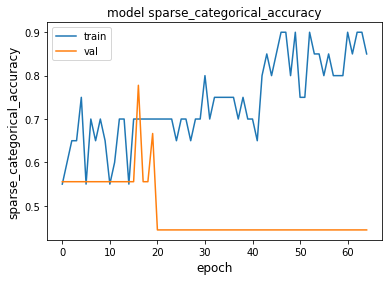

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()